![https://raw.githubusercontent.com/inverted-ai/invertedai/master/docs/images/banner-small.png](https://raw.githubusercontent.com/inverted-ai/invertedai/master/docs/images/banner-small.png)

In [ ]:
!pip install invertedai
%matplotlib widget
from IPython.display import clear_output
from invertedai import Jupyter_Render
import numpy as np
import cv2
import invertedai as iai
clear_output()

# Provide your API key

In [ ]:
iai.add_apikey("")

# Specify the location

In [36]:
location = "canada:vancouver:terminal_and_quebec"

 # Set the simulation length (1 step = 0.1 second)

In [37]:
simulation_length = 30 

# Initialize local renderer

Jupyter_Render(children=(HBox(children=(Play(value=0, description='Press play', max=0), IntSlider(value=0, des…

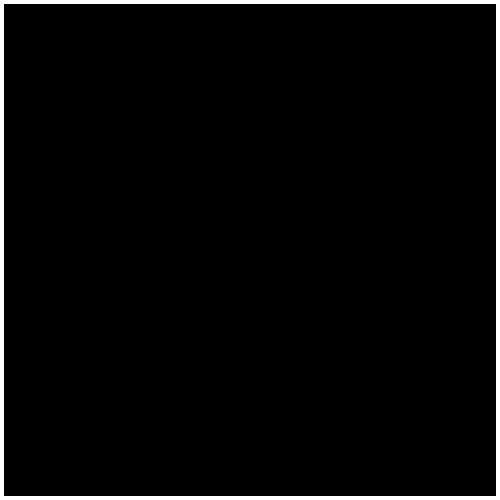

In [38]:
renderer = Jupyter_Render()
display(renderer)

# Preview the map location

In [42]:
rendered_map = iai.location_info(location=location).birdview_image.decode()
renderer.add_frame(rendered_map)

# Initialize the simulation

In [43]:
simulation = iai.BasicCosimulation(
    location=location,
    agent_count=10,
    get_birdview=True,
    traffic_lights=True,
)
birdview = simulation.birdview.decode()
renderer.add_frame(birdview)

# Start the simulation
\* Returning the birdviews will casue a much longer response time than running without them.

In [47]:
frames = []
for t in range(simulation_length):
    simulation.step(current_ego_agent_states=[])
    birdview = simulation.birdview.decode()
    renderer.add_frame(birdview)

In [25]:
import numpy as np
img = np.zeros((512, 512, 3), dtype=np.uint8)
encode_param = [int(cv2.IMWRITE_JPEG_QUALITY), 80]
_, encimg = cv2.imencode(".jpg", img.astype(np.uint8), encode_param)
img = encimg.tolist()

In [ ]:
#print(img)